In [2]:
from itertools import count

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
colors = pd.read_csv('data/colors.csv')
sets = pd.read_csv('data/sets.csv')
themes = pd.read_csv('data/themes.csv')

In [4]:
colors.head()

,id,name,rgb,is_trans,num_parts,num_sets,y1,y2
0,-1,[Unknown],0033B2,False,7,7,2003.0,2012.0
1,0,Black,05131D,False,732655,202858,1957.0,2025.0
2,1,Blue,0055BF,False,191272,46053,1949.0,2025.0
3,2,Green,237841,False,78595,23543,1949.0,2025.0
4,3,Dark Turquoise,008F9B,False,19476,5081,1998.0,2025.0


In [5]:
colors['name'].nunique()

267

In [6]:
colors[colors.is_trans == True].shape[0]

45

In [7]:
colors.groupby("is_trans").count()

,id,name,rgb,num_parts,num_sets,y1,y2
is_trans,,,,,,,
False,222,222,222,222,222,212,212
True,45,45,45,45,45,43,43


In [8]:
sets.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [9]:
sets.tail()

,set_num,name,year,theme_id,num_parts,img_url
24770,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413,https://cdn.rebrickable.com/media/sets/yodachr...
24771,YOTO-1,"1, 2, 3 Play with Me YOTO Cards",2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-1.jpg
24772,YOTO-2,A is for Alphabet,2021,501,0,https://cdn.rebrickable.com/media/sets/yoto-2.jpg
24773,YTERRIER-1,Yorkshire Terrier,2018,598,0,https://cdn.rebrickable.com/media/sets/yterrie...
24774,ZX8000-1,ZX 8000 LEGO Sneaker,2020,501,0,https://cdn.rebrickable.com/media/sets/zx8000-...


In [10]:
sets['year'].min()

np.int64(1949)

In [11]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts,img_url
14931,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
14949,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
14956,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...
14944,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
14955,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...


In [12]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts,img_url
14931,700.1-1,Extra-Large Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.1-1...
14944,700.2-1,Large Gift Set (ABB),1949,365,178,https://cdn.rebrickable.com/media/sets/700.2-1...
14949,700.3-1,Medium Gift Set (ABB),1949,365,142,https://cdn.rebrickable.com/media/sets/700.3-1...
14955,700.A-1,Small Brick Set (ABB),1949,371,24,https://cdn.rebrickable.com/media/sets/700.a-1...
14956,700.B-1,Small Doors and Windows Set (ABB),1949,371,12,https://cdn.rebrickable.com/media/sets/700.b-1...


In [13]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts,img_url
4890,31203-1,World Map,2021,709,11695,https://cdn.rebrickable.com/media/sets/31203-1...
470,10307-1,Eiffel Tower,2022,721,10001,https://cdn.rebrickable.com/media/sets/10307-1...
23175,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987,https://cdn.rebrickable.com/media/sets/bigbox-...
456,10294-1,Titanic,2021,721,9092,https://cdn.rebrickable.com/media/sets/10294-1...
437,10276-1,Colosseum,2020,721,9036,https://cdn.rebrickable.com/media/sets/10276-1...


In [14]:
sets.groupby('year').count()

,set_num,name,theme_id,num_parts,img_url
year,,,,,
1949,5,5,5,5,5
1950,6,6,6,6,6
1953,4,4,4,4,4
1954,14,14,14,14,14
1955,39,39,39,39,39
...,...,...,...,...,...
2021,1219,1219,1219,1219,1219
2022,1209,1209,1209,1209,1209
2023,1140,1140,1140,1140,1140


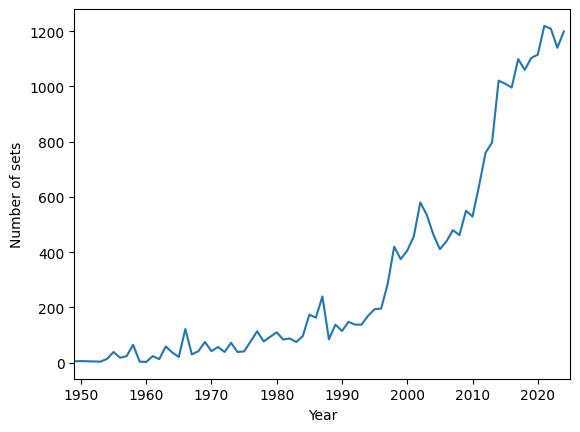

In [15]:
# Visualise the Data with Matplotlib

plt.xlabel('Year')
plt.ylabel('Number of sets')
plt.xlim(1949, 2025)

# Since the year 2025 only started it is a good idea to don't include it in the analysis yet
sets_per_year = sets.groupby('year').count()[:-1]

plt.plot(sets_per_year.index, sets_per_year['set_num'])

In [16]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})
themes_by_year.rename(columns={'theme_id': "nr_themes"}, inplace=True)
themes_by_year.tail()

,nr_themes
year,
2021,99
2022,95
2023,105
2024,103
2025,67


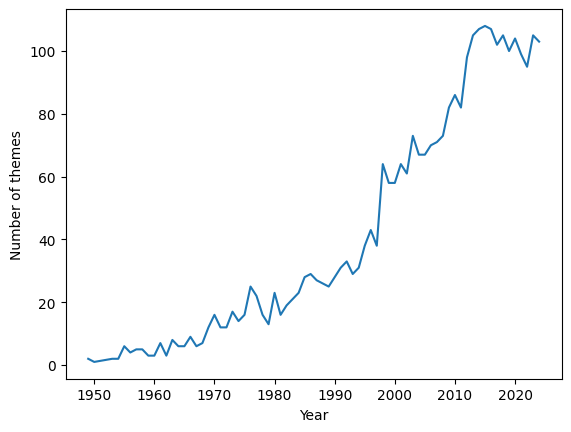

In [17]:
plt.xlabel("Year")
plt.ylabel("Number of themes")

plt.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1])

Text(0, 0.5, 'Number of Themes')

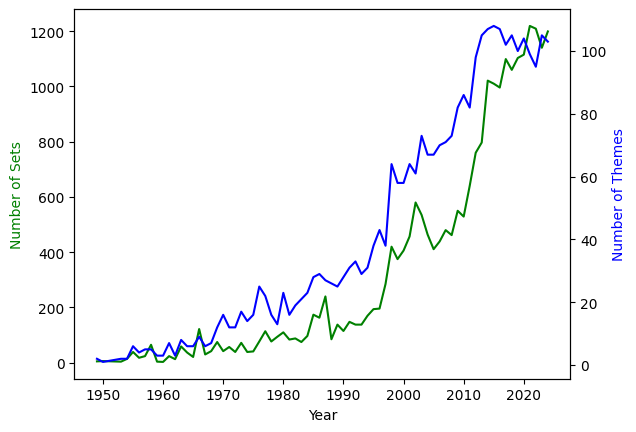

In [18]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx()

# Add styling
ax1.plot(sets_per_year.index, sets_per_year['set_num'], color='g')
ax2.plot(themes_by_year.index[:-1], themes_by_year.nr_themes[:-1], color='b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [19]:
 # Average number of parts per year
 parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
 parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,12.500000
1954,8.357143
1955,12.205128


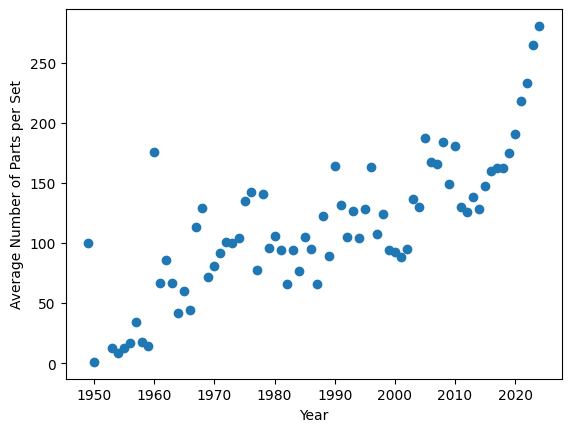

In [20]:
# Generate a scatter plot to visualise the data
plt.xlabel("Year")
plt.ylabel("Average Number of Parts per Set")
plt.scatter(parts_per_set.index[:-1], parts_per_set.num_parts[:-1])

In [21]:
# Upward trend in the size and complexity of the LEGO set based on the average number of parts.

#Also it would be nice to research the fact that LEGO is a privately held company, so its financial information isn't updated in real time; Therefore we cannot compare it against company's revenue.

In [22]:
themes[themes['name'] == 'Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
122,261,Star Wars,258.0


In [23]:
sets[sets['theme_id']== 18]

,set_num,name,year,theme_id,num_parts,img_url
13881,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
18395,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
18402,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
18413,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
18454,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
18455,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
18456,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
18457,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
18469,8011-1,Jango Fett,2002,18,426,https://cdn.rebrickable.com/media/sets/8011-1.jpg
18476,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


In [26]:
# Number of Sets per LEGO Theme
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

theme_id
501    1239
158     956
503     782
494     621
435     567
Name: count, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

In [27]:
# Display themes from themes.csv
themes = pd.read_csv('data/themes.csv')
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,3,Competition,1.0
2,4,Expert Builder,1.0
3,16,RoboRiders,1.0
4,17,Speed Slammers,1.0


In [29]:
# Search for a particular theme
themes[themes.name == 'Star Wars']

,id,name,parent_id
5,18,Star Wars,1.0
74,158,Star Wars,NaN
95,209,Star Wars,207.0
122,261,Star Wars,258.0


In [32]:
# Check which products corresponded to a particular theme
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts,img_url
13881,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1,https://cdn.rebrickable.com/media/sets/65081-1...
18395,8000-1,Pit Droid,2000,18,223,https://cdn.rebrickable.com/media/sets/8000-1.jpg
18402,8001-1,Battle Droid,2000,18,336,https://cdn.rebrickable.com/media/sets/8001-1.jpg
18413,8002-1,Destroyer Droid,2000,18,567,https://cdn.rebrickable.com/media/sets/8002-1.jpg
18454,8007-1,C-3PO,2001,18,339,https://cdn.rebrickable.com/media/sets/8007-1.jpg
18455,8008-1,Stormtrooper,2001,18,361,https://cdn.rebrickable.com/media/sets/8008-1.jpg
18456,8009-1,R2-D2,2002,18,239,https://cdn.rebrickable.com/media/sets/8009-1.jpg
18457,8010-1,Darth Vader,2002,18,388,https://cdn.rebrickable.com/media/sets/8010-1.jpg
18469,8011-1,Jango Fett,2002,18,426,https://cdn.rebrickable.com/media/sets/8011-1.jpg
18476,8012-1,Super Battle Droid,2002,18,378,https://cdn.rebrickable.com/media/sets/8012-1.jpg


In [33]:
# Merge DataFrames using .merge() to create bar charts
# Convert Pd Data Series into Pd DataFrame based on a Key
set_theme_count = pd.DataFrame({'id': set_theme_count.index,
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,1239
1,158,956
2,503,782
3,494,621
4,435,567


In [34]:
# Merge DFs on 'id' 
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,1239,Gear,NaN
1,158,956,Star Wars,NaN
2,503,782,Key Chain,501.0


<BarContainer object of 10 artists>

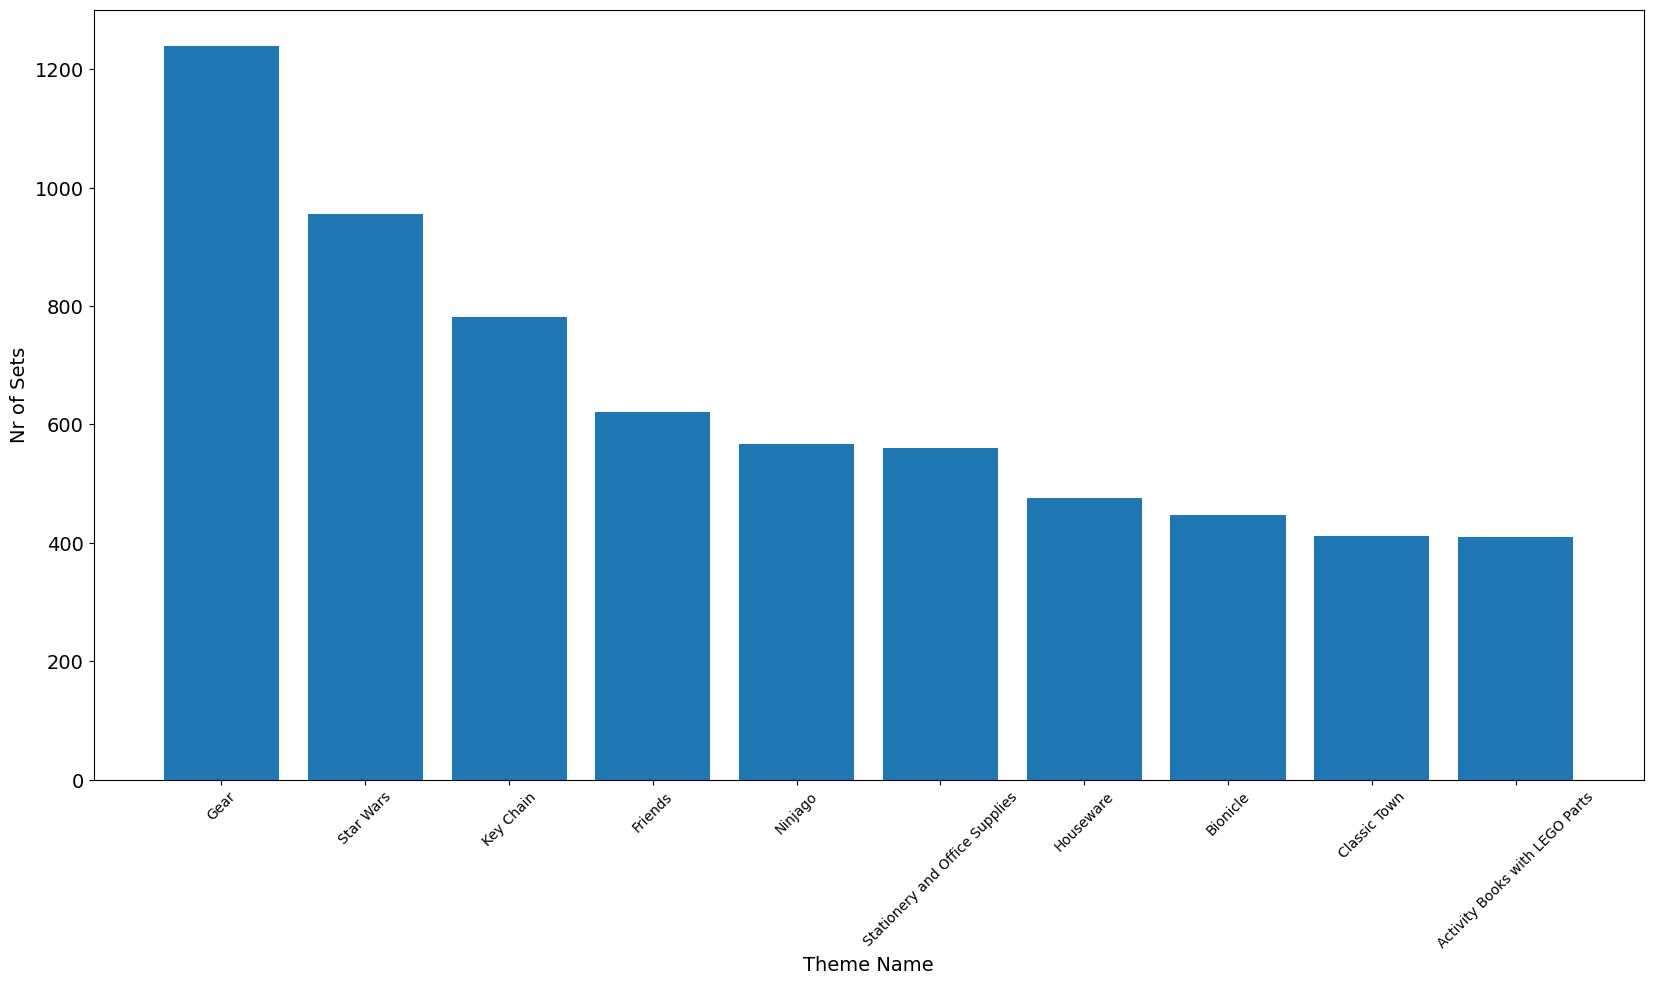

In [49]:
# Plot bar chart with matplotlib
plt.figure(figsize=(20,10))
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])